In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image

In [96]:
def read_file(fileName):
    img = cv2.imread(fileName)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

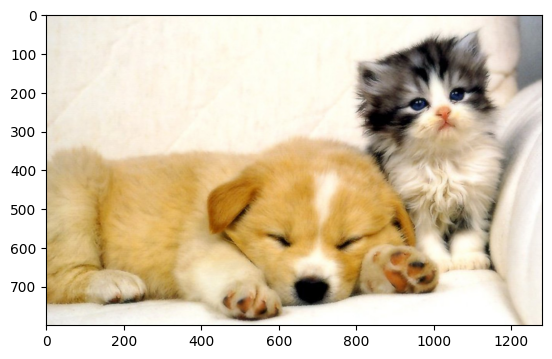

In [97]:
fileName = "R.jpg"
img = read_file(fileName)

org_img = np.copy(img)

# Create Edge Mask

In [98]:
def edge_mask(img, line_size, blur_value):

    """ 
    input: Input Image
    Output: Edgesof Images
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

    return edges

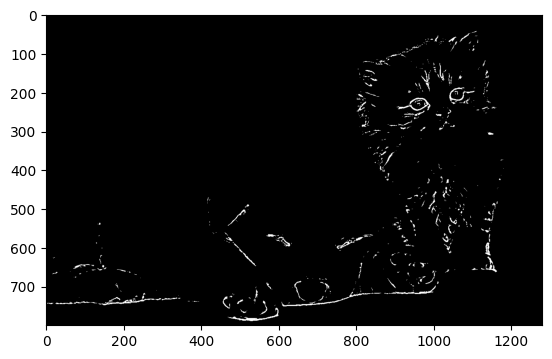

In [99]:
line_size, blur_value = 7, 7
edges  = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap='binary')
plt.show()

# Reduce the Color Palette

In [100]:
def color_quantization(img, k):
    #Transform the image
    data = np.float32(img).reshape((-1,3))

    # Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.01)

    #Implementing k-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

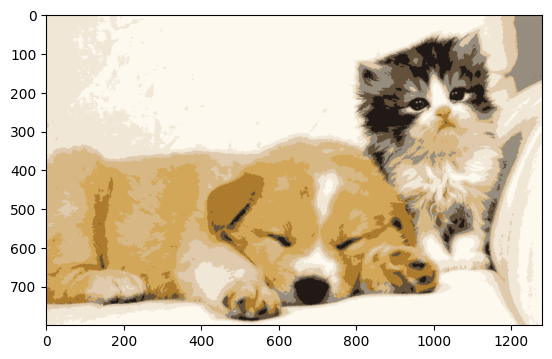

In [101]:
img = color_quantization(img, k=9)

plt.imshow(img)
plt.show()

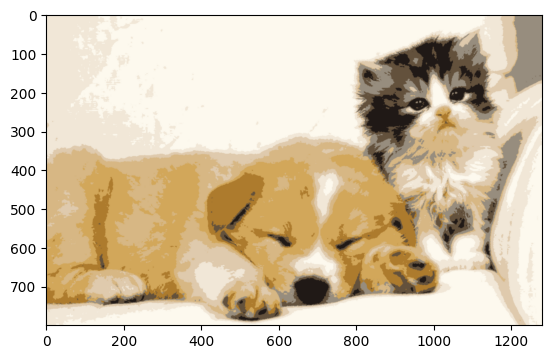

In [102]:
# Reduce the noise

blurred = cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

# Combine Edge Mask with the quantiz img

In [103]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask=edges)

    plt.imshow(c)
    plt.title("Cartoonified Image:")
    plt.show()


    plt.imshow(org_img)
    plt.title("Original Image")
    plt.show()

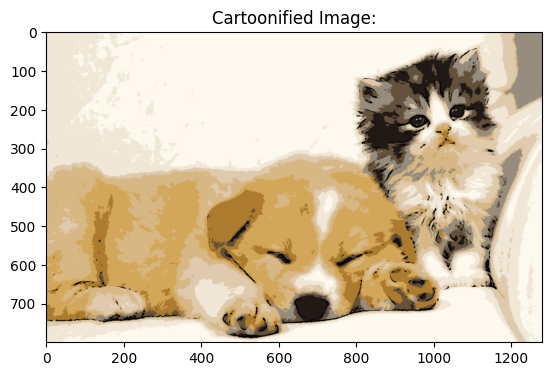

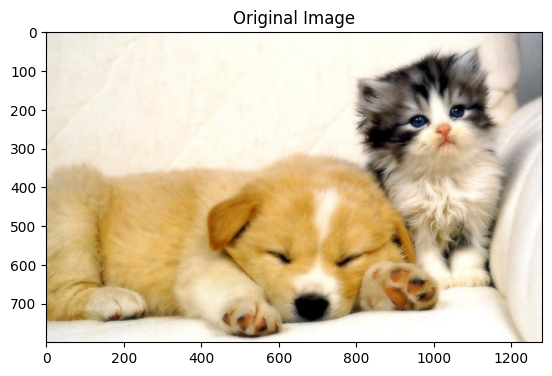

In [104]:
cartoon()